<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.nus.edu.sg/images/default-source/base/logo.png' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Machine Learning in Python</h1><h2>Lab 5a - K-Means Clustering </h2><h3></h3></th>
    </tr>
</table>

### 1. Introduction
You are owing a supermarket mall and through membership cards , you have some basic data about your customers, e.g. age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

You want to understand the customers' spending patterns so that can be given to marketing team to plan the strategy accordingly.

### 2. Load Data

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Import dataset: Shopping Mall Customers Information
dat = pd.read_csv('Mall_Customers.csv')

In [3]:
# Preview the data: four columns/attributes
dat.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [4]:
# Select Two colulmns: Annual Income & Spending Score
df = dat.iloc[:,[2,3]]
df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [20]:
# Convert dataframe into numpy arrays
X =df.values
# X

In [7]:
# Scaling the data so that all the features/attributes become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### 3. Build and Evaluate the K-means Model

In [8]:
# Build a K-means clustering model
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=300, random_state=1)
# n_clusters: number of clusters
# n_init: Number of time the k-means algorithm will be run with different centroid seeds.
# max_iter: Maximum number of iterations of the k-means algorithm for a single run

In [9]:
# Fit the Model on our dataset
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=20, random_state=1)

In [10]:
# View the Coordinates of cluster centers (i.e. the centroids)
kmeans.cluster_centers_

array([[ 0.99158305,  1.23950275],
       [ 1.00919971, -1.22553537],
       [-0.62618966, -0.01439238]])

In [11]:
# Assign each data object/point to the cluster represented by its nearest centroid
y_pred = kmeans.predict(X_scaled)

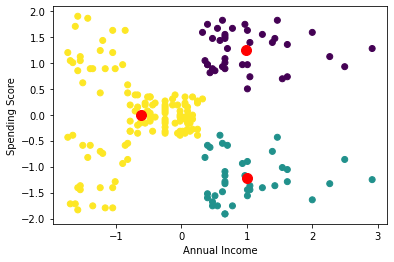

In [12]:
# Visualise the Clusters and their corresponding centroids in the below graph
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [13]:
# Evalute the model using Sum of Squared Errors (SSE) 
kmeans.inertia_

157.70400815035944

### 4. Improve the Model

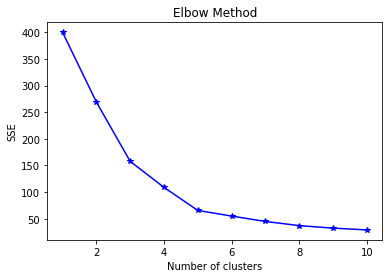

In [14]:
# Find the optimal number of clusters (i.e. K) using elbow method
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=1)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse, 'b-*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

From the above graph, we can see K=5 is the optimal number of clusters for this problem.

In [15]:
# Build the model using the optimal n_cluster
kmeans = KMeans(n_clusters=5, n_init=20, random_state=1)
# Fit the model and assign each data point to the cluster
y_pred = kmeans.fit_predict(X_scaled) # fit and then predict

### 5. Visualize the Clusters

* Visualise the Clusters and their corresponding centroids using scatter plot

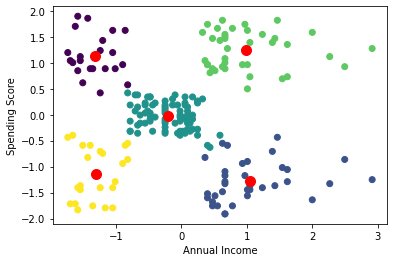

In [16]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### 6. Intepret the Model
This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers based on their Annual Income and Spending Score:  
* Cluster 1: low income but high spending
* Cluster 2: high income but low spending
* Cluster 3: average income and average spending
* Cluster 4: high income and high spending
* Cluster 5: low income and low spending

From marketing perspective, we should try to motive the customers from cluster 2 to spend more and at the same time make sure customers of cluster 4 continue with their current spending patterns.

### 6. Exercise
Use bank dataset (`bank.csv`), randomly select 200 samples and select columns / attributes `age` and `balance` to build K-means clustering model. Utilize elbow method to find the optimal K, Visualize the Clusters and Intepret the Model.

In [ ]:
#Task 1: Load Data from bank.csv


In [11]:
df = pd.read_csv('bank.csv', encoding='utf-8')
df = df[["age","balance"]]
df

,age,balance
0,59,2343
1,56,45
2,41,1270
3,55,2476
4,54,184
...,...,...
11157,33,1
11158,39,733
11159,32,29
11160,43,0


In [12]:
#Task 2: Randomly select 200 samples and select column age & balance


In [13]:
df = df.sample(200, random_state=10)

In [14]:
X = df.values

In [15]:
# Task 2: Scaled the data


In [16]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
# X_scaled

In [17]:
# Task 3: Build Model: using Elbow Method to find the optimal K


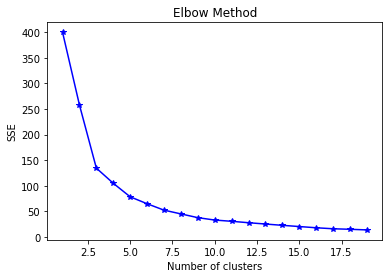

In [18]:
sse = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, n_init=20, random_state=1)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 20), sse, 'b-*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=5, n_init=20, random_state=10)

In [47]:
kmeans.fit(X_scaled)

KMeans(n_clusters=5, n_init=20, random_state=10)

In [48]:
y_pred = kmeans.fit_predict(X_scaled)

In [49]:
# Task 4: Visualise the Clusters


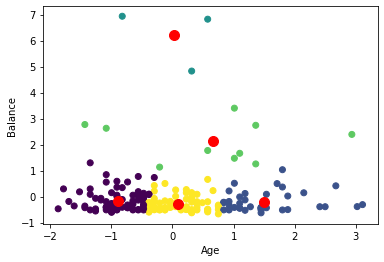

In [50]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

In [37]:
# Task 5: Intepret the Model

In [52]:
print('''Cluster 1: low age but high balance
Cluster 2: high age but low balance
Cluster 3: average age and average balance
Cluster 4: high age and high balance
Cluster 5: low age and low balance''')

Cluster 1: low age but high balance
Cluster 2: high age but low balance
Cluster 3: average age and average balance
Cluster 4: high age and high balance
Cluster 5: low age and low balance
